In [153]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd

In [154]:
##Add Dataset
sales=pd.read_csv('supermarket_sales.csv')

In [155]:
ds=sales.copy()

In [156]:
ds.groupby(["Gender"])["Total"].mean()

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64

## Which product type is more profitable?

In [157]:
categorical_vars = ['Product line']
numerical_vars = ['gross income']

In [158]:
mean_values = ds.groupby(categorical_vars)[numerical_vars].mean().reset_index()

In [159]:
print(mean_values)

             Product line  gross income
0  Electronic accessories     15.220597
1     Fashion accessories     14.528062
2      Food and beverages     15.365310
3       Health and beauty     15.411572
4      Home and lifestyle     16.030331
5       Sports and travel     15.812630


In [160]:
pivot_table = mean_values.pivot_table(index=categorical_vars, values=numerical_vars, aggfunc='mean')

In [161]:
print(pivot_table)

                        gross income
Product line                        
Electronic accessories     15.220597
Fashion accessories        14.528062
Food and beverages         15.365310
Health and beauty          15.411572
Home and lifestyle         16.030331
Sports and travel          15.812630


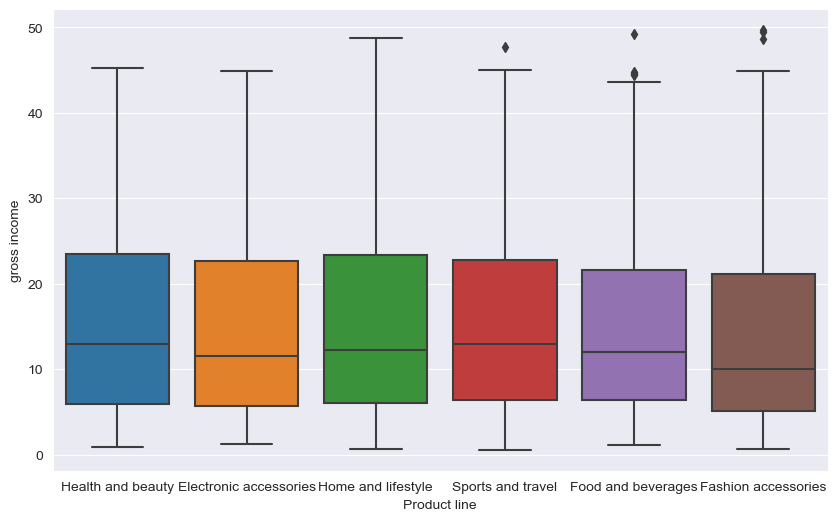

In [162]:
for cat_var in categorical_vars:
    for num_var in numerical_vars:
        plt.figure(figsize=(10,6))
        sns.boxplot(x=cat_var, y=num_var, data=ds)
        plt.show()

In [163]:
print(ds.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


## Which city is more profitable?

In [164]:
categorical_vars = ['City']
numerical_vars = ['gross income']

In [165]:
mean_city = ds.groupby(categorical_vars)[numerical_vars].mean().reset_index()

In [166]:
print(mean_city)

        City  gross income
0   Mandalay     15.232024
1  Naypyitaw     16.052367
2     Yangon     14.874001


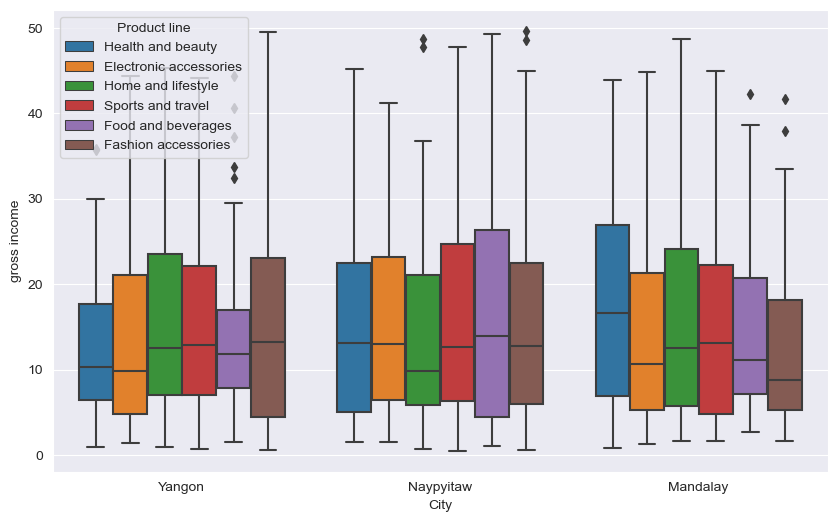

In [167]:
for cat_var in categorical_vars:
    for num_var in numerical_vars:
        plt.figure(figsize=(10,6))
        sns.boxplot(x=cat_var, y=num_var,hue='Product line', data=ds)
        plt.show()
        
        

In [168]:
ds["Date"] = pd.to_datetime(ds["Date"])
ds['month'] = ds['Date'].dt.strftime('%Y-%m')
monthly_income = ds.groupby('month')['gross income'].sum().reset_index()

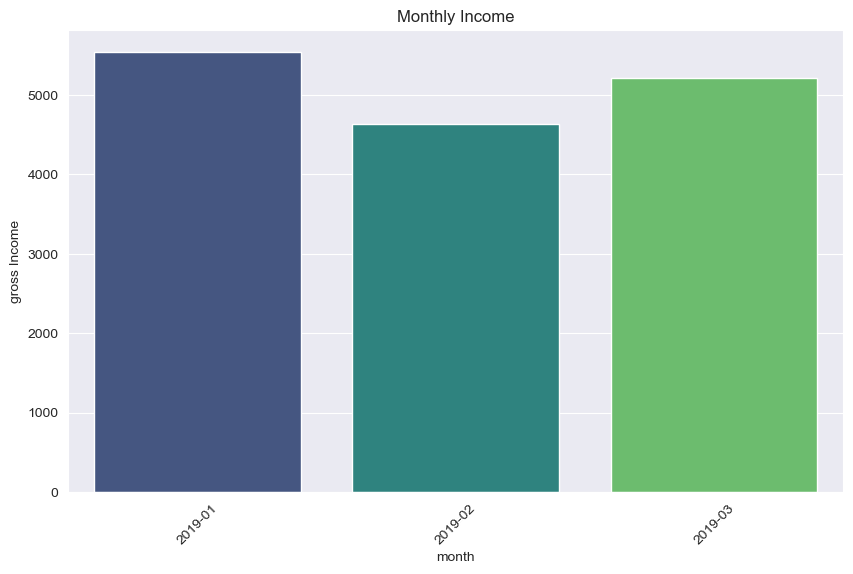

In [176]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='gross income',data=monthly_income, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('month')
plt.ylabel('gross Income')
plt.title('Monthly Income')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month', ylabel='gross income'>

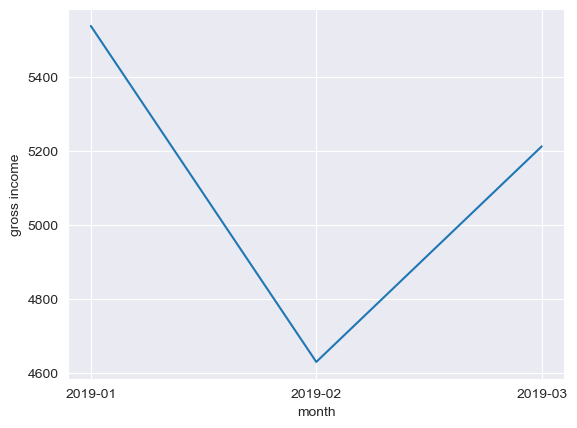

In [179]:

sns.lineplot(x='month',y='gross income', data=monthly_income)

In [173]:
print(monthly_income)

     month  gross income
0  2019-01      5537.708
1  2019-02      4629.494
2  2019-03      5212.167
